In [1]:
import os
import pandas as pd #for Dataframe
import numpy as np
import matplotlib.pyplot as plt #for plot
import matplotlib.cm as cm #for wordcloud
import seaborn as sns #for plot
import warnings 
warnings.filterwarnings("ignore")
import string #for punctuation
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
os.chdir(r"D:\Ashita\Desktop\Python Notes\Excel Notes")
data=pd.read_csv("TCS_feedback.csv")

In [3]:
data.head(20)

,Date,Pros,Cons,Advice to Management,Rating,Employement_status,Designation,Location,Work_Life_Bal,Culture_Values,Career_Opportunity,Compensation_Benefits,Senior Management
0,17-Apr-20,job security\ngood teams\ngood learning scope,only hikes apart from that everything is fine,NaN,5,Current Employee,Hadoop Developer,Chennai,NaN,NaN,NaN,NaN,NaN
1,16-Apr-20,Work culture is good,Not as such to say,NaN,4,Former Employee,IT Analyst,Pune,5.0,3.0,3.0,4.0,3.0
2,16-Apr-20,Great environment\nleast work\nwork-personal l...,less salary\nHigher management doesn't listen,NaN,4,Current Employee,IT Analyst,NaN,5.0,5.0,2.0,3.0,2.0
3,16-Apr-20,Good Work Life Balance Good place to start you...,Your experience depends upon your project. Les...,NaN,4,Former Employee,Systems Engineer,Bangalore,5.0,5.0,5.0,3.0,4.0
4,16-Apr-20,loads of opportunities and rewards,Highly dense environment and less hikes,NaN,4,Current Employee,Assistant Systems Engineer,Chennai,5.0,5.0,5.0,3.0,3.0
5,16-Apr-20,nice projects and work life balance,salary and increments is very low,NaN,4,Current Employee,Senior Software Developer,"Gurgaon, Haryana",5.0,5.0,4.0,2.0,4.0
6,17-Apr-20,job security in it sector possible in this com...,"salary is less, increments very slow",NaN,4,Former Employee,Senior Software Engineer,Hyderābād,4.0,5.0,4.0,3.0,4.0
7,30-Apr-20,"Work life balance, flexible work hours","Compensation, Rewards, rigid policies, other b...",NaN,3,Current Employee,Delivery Manager,Hyderābād,4.0,4.0,3.0,3.0,4.0
8,30-Apr-20,"Facilities, locations, reputation, work-life b...","Compensation is less, learning opportunities a...",NaN,3,Former Employee,Assistant Systems Engineer,Bangalore,3.0,3.0,3.0,2.0,3.0
9,30-Apr-20,Nothing is good about TCS,"Everything...No Hikes, Management makes unheal...",NaN,3,Former Employee,Chief Executive Officer,NaN,5.0,4.0,2.0,2.0,2.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5080 entries, 0 to 5079
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   5080 non-null   object 
 1   Pros                   5080 non-null   object 
 2   Cons                   5080 non-null   object 
 3   Advice to Management   797 non-null    object 
 4   Rating                 5080 non-null   int64  
 5   Employement_status     5001 non-null   object 
 6   Designation            5017 non-null   object 
 7   Location               3283 non-null   object 
 8   Work_Life_Bal          4310 non-null   float64
 9   Culture_Values         4281 non-null   float64
 10  Career_Opportunity     4274 non-null   float64
 11  Compensation_Benefits  4263 non-null   float64
 12  Senior Management      4223 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 516.1+ KB


In [5]:
df=data[["Pros"]]
df.head()

,Pros
0,job security\ngood teams\ngood learning scope
1,Work culture is good
2,Great environment\nleast work\nwork-personal l...
3,Good Work Life Balance Good place to start you...
4,loads of opportunities and rewards


In [6]:
df1=data[["Cons"]]
df1.head()

,Cons
0,only hikes apart from that everything is fine
1,Not as such to say
2,less salary\nHigher management doesn't listen
3,Your experience depends upon your project. Les...
4,Highly dense environment and less hikes


### Lower casing

In [7]:
df["Pros"]=df["Pros"].str.lower()
df.head()

,Pros
0,job security\ngood teams\ngood learning scope
1,work culture is good
2,great environment\nleast work\nwork-personal l...
3,good work life balance good place to start you...
4,loads of opportunities and rewards


In [8]:
df1["Cons"]=df1["Cons"].str.lower()
df1.head()

,Cons
0,only hikes apart from that everything is fine
1,not as such to say
2,less salary\nhigher management doesn't listen
3,your experience depends upon your project. les...
4,highly dense environment and less hikes


### Spliting and Removing Punctuation

In [9]:
PUNCT_TO_REMOVE = string.punctuation
PUNCT_TO_REMOVE

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_punctuation(Punc):
    """custom function to remove the punctuation"""
    return Punc.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [11]:
df["Pros"] = df["Pros"].apply(lambda Punc: remove_punctuation(Punc))
df.head()

,Pros
0,job security\ngood teams\ngood learning scope
1,work culture is good
2,great environment\nleast work\nworkpersonal li...
3,good work life balance good place to start you...
4,loads of opportunities and rewards


In [12]:
df1["Cons"] = df1["Cons"].apply(lambda Punc: remove_punctuation(Punc))
df1.head()

,Cons
0,only hikes apart from that everything is fine
1,not as such to say
2,less salary\nhigher management doesnt listen
3,your experience depends upon your project less...
4,highly dense environment and less hikes


### Remove Stopwords

In [13]:
import nltk 
nltk.download('stopwords') #the English words which does not add much meaning to a sentence. 
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')
allstopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashug\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
df["Pros"] = df["Pros"].apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))
df.head()

,Pros
0,job security good teams good learning scope
1,work culture good
2,great environment least work workpersonal life...
3,good work life balance good place start career
4,loads opportunities rewards


In [15]:
df1["Cons"] = df1["Cons"].apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))
df1.head()

,Cons
0,hikes apart everything fine
1,say
2,less salary higher management doesnt listen
3,experience depends upon project less hikes
4,highly dense environment less hikes


### Remove Frequent Words

In [16]:
from collections import Counter
cnt = Counter()

In [17]:
for text in df["Pros"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('good', 2888),
 ('work', 2558),
 ('balance', 1155),
 ('life', 1114),
 ('job', 865),
 ('company', 657),
 ('security', 652),
 ('environment', 617),
 ('opportunities', 540),
 ('learning', 433)]

In [18]:
for text in df1["Cons"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('good', 3485),
 ('work', 3319),
 ('balance', 1278),
 ('less', 1259),
 ('life', 1247),
 ('salary', 1223),
 ('company', 964),
 ('job', 918),
 ('opportunities', 728),
 ('project', 677)]

In [19]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
FREQWORDS

{'balance',
 'company',
 'good',
 'job',
 'less',
 'life',
 'opportunities',
 'project',
 'salary',
 'work'}

In [20]:
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

In [21]:
df["Pros"] = df["Pros"].apply(lambda text: remove_freqwords(text)) #removed
df.head()

,Pros
0,security teams learning scope
1,culture
2,great environment least workpersonal balanced
3,place start career
4,loads rewards


In [22]:
df1["Cons"] = df1["Cons"].apply(lambda text: remove_freqwords(text)) #removed
df1.head()

,Cons
0,hikes apart everything fine
1,say
2,higher management doesnt listen
3,experience depends upon hikes
4,highly dense environment hikes


### Remove Rarewords

In [23]:
n_rare_words = 10

In [24]:
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
RAREWORDS

{'asking',
 'casteism',
 'fashioned',
 'geeks',
 'observe',
 'pinch',
 'retro',
 'stricter',
 'technoligies',
 'timid'}

In [25]:
def remove_rarewords(Rare):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(Rare).split() if word not in RAREWORDS])

In [26]:
df["Pros"] = df["Pros"].apply(lambda Rare: remove_rarewords(Rare))
df.head()

,Pros
0,security teams learning scope
1,culture
2,great environment least workpersonal balanced
3,place start career
4,loads rewards


In [27]:
df1["Cons"] = df1["Cons"].apply(lambda Rare: remove_rarewords(Rare))
df1.head()

,Cons
0,hikes apart everything fine
1,say
2,higher management doesnt listen
3,experience depends upon hikes
4,highly dense environment hikes


### Lemitization

In [28]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet corpus if not already downloaded
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashug\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
# Tokenize the sentence into words
words = nltk.word_tokenize(text)

# Lemmatize each word
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

lemmatized_sentence = ' '.join(lemmatized_words)

print(lemmatized_words)


['work', 'growth']


### Removing Emoji

In [30]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [31]:
df["Pros"] = df["Pros"].apply(lambda string: remove_emoji(string))
df.head()

,Pros
0,security teams learning scope
1,culture
2,great environment least workpersonal balanced
3,place start career
4,loads rewards


In [32]:
df1["Cons"] = df1["Cons"].apply(lambda string: remove_emoji(string))
df1.head()

,Cons
0,hikes apart everything fine
1,say
2,higher management doesnt listen
3,experience depends upon hikes
4,highly dense environment hikes


In [33]:
df1["Cons"][2]

'higher management doesnt listen'

In [34]:
import pandas as pd
import os
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ashug\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [35]:
sent = SentimentIntensityAnalyzer()

In [36]:
df.head(10)

,Pros
0,security teams learning scope
1,culture
2,great environment least workpersonal balanced
3,place start career
4,loads rewards
5,nice projects
6,security sector possible
7,flexible hours
8,facilities locations reputation worklife
9,nothing tcs


In [37]:
df1.head(10)

,Cons
0,hikes apart everything fine
1,say
2,higher management doesnt listen
3,experience depends upon hikes
4,highly dense environment hikes
5,increments low
6,increments slow
7,compensation rewards rigid policies benefits
8,compensation learning
9,everythingno hikes management makes unhealthy env


In [38]:
polarity = [round(sent.polarity_scores(i)['compound'], 2)*100 for i in df["Pros"]]
df['sentiment_score'] = polarity
df.head()
#polarity

,Pros,sentiment_score
0,security teams learning scope,34.0
1,culture,0.0
2,great environment least workpersonal balanced,62.0
3,place start career,0.0
4,loads rewards,48.0


In [39]:
polarity = [round(sent.polarity_scores(i)['compound'], 2)*100 for i in df1["Cons"]]
df1['sentiment_score'] = polarity
df1.head(10)
#polarity

,Cons,sentiment_score
0,hikes apart everything fine,20.0
1,say,0.0
2,higher management doesnt listen,0.0
3,experience depends upon hikes,0.0
4,highly dense environment hikes,0.0
5,increments low,-27.0
6,increments slow,0.0
7,compensation rewards rigid policies benefits,64.0
8,compensation learning,0.0
9,everythingno hikes management makes unhealthy env,-53.0


In [40]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

In [41]:
def get_ngrams(text, n=2):
    text = str(df["Pros"])
    n_grams = ngrams(text.split(), n)
    returnVal = []

    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass

    return ' '.join(returnVal).strip()

In [42]:
def get_ngrams(text, n=2):
    text = str(df1["Cons"])
    n_grams = ngrams(text.split(), n)
    returnVal = []

    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass



In [43]:
df['trigram_text'] = df["Pros"].apply(get_ngrams, n=3)
df.head(10)

,Pros,sentiment_score,trigram_text
0,security teams learning scope,34.0,None
1,culture,0.0,None
2,great environment least workpersonal balanced,62.0,None
3,place start career,0.0,None
4,loads rewards,48.0,None
5,nice projects,42.0,None
6,security sector possible,34.0,None
7,flexible hours,23.0,None
8,facilities locations reputation worklife,0.0,None
9,nothing tcs,0.0,None


In [44]:
df1['trigram_text'] = df1["Cons"].apply(get_ngrams, n=3)
df1.head(10)

,Cons,sentiment_score,trigram_text
0,hikes apart everything fine,20.0,None
1,say,0.0,None
2,higher management doesnt listen,0.0,None
3,experience depends upon hikes,0.0,None
4,highly dense environment hikes,0.0,None
5,increments low,-27.0,None
6,increments slow,0.0,None
7,compensation rewards rigid policies benefits,64.0,None
8,compensation learning,0.0,None
9,everythingno hikes management makes unhealthy env,-53.0,None


In [45]:
Trigram_string_list = df["Pros"].tolist()
trigram_string = ' '.join(Trigram_string_list)
trigram_string

'security teams learning scope culture great environment least workpersonal balanced place start career loads rewards nice projects security sector possible flexible hours facilities locations reputation worklife nothing tcs facilities locations reputation worklife nothing tcs stability insurance coverage parents learn practice ethics basic knowledge programing language required quite flexible pressure culture events fun activities exposure multiple clients technologies ethics environment pressure security policies although followed ground level policies although followed ground level lucky get technology pressure big name opportunity lucky enough manage big peoples pressure well secured compare industries best part organization relation able build coemployees culture lot learning place learn person starting career employee friendly exciting perks manger team understanding supported offshore onsite successful delivery projects culture lots learn fresher best made decision settle proces

In [46]:
Trigram_string_list = df1["Cons"].tolist()
trigram_string1 = ' '.join(Trigram_string_list)
trigram_string1

'hikes apart everything fine say higher management doesnt listen experience depends upon hikes highly dense environment hikes increments low increments slow compensation rewards rigid policies benefits compensation learning everythingno hikes management makes unhealthy env compensation learning everythingno hikes management makes unhealthy env  dont spend long time joined fresher resources managed properly dont find except increment significant cons experience lot senior heirarchy creates confusion hikes forcing staff report covid19 forcing staff report covid19 much growth per financial basis low slow promotion high politics managemwnt poor managemnet culture hikes may bit lower side continue organization experience shifting another may get higher package cr process need lot approvals tcs got policy recruit old employees appreciation increment compared standards much available career growth long time looking onsite offered much difficult shifts depending account hike nothing else feel 

In [47]:
from wordcloud import WordCloud   # for the wordcloud

In [48]:
wordcloud = WordCloud(width = 2000, height = 1334, random_state=1,
                      background_color='black', colormap='Pastel1',
                      max_words = 75, collocations=False, normalize_plurals=False).generate(trigram_string)

In [49]:
wordcloud1 = WordCloud(width = 2000, height = 1334, random_state=1,
                      background_color='black', colormap='Pastel1',
                      max_words = 75, collocations=False, normalize_plurals=False).generate(trigram_string1)

In [50]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Pros Word Cloud

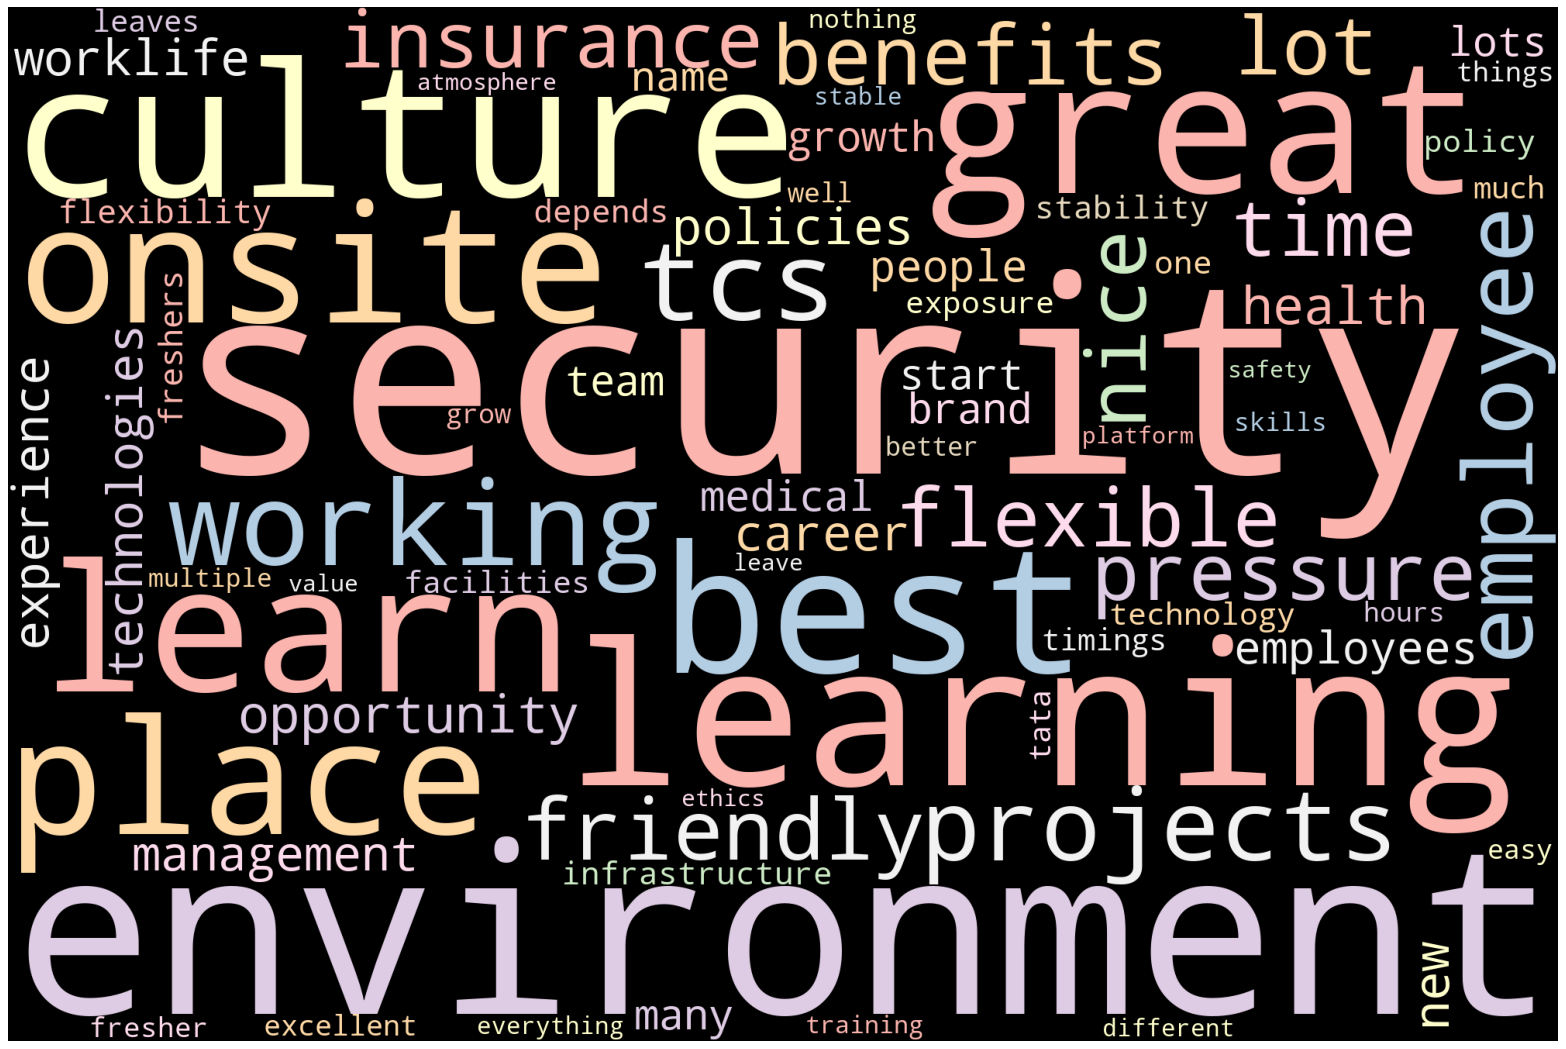

In [51]:
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(25, 17), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close()

#Plot
plot_cloud(wordcloud)


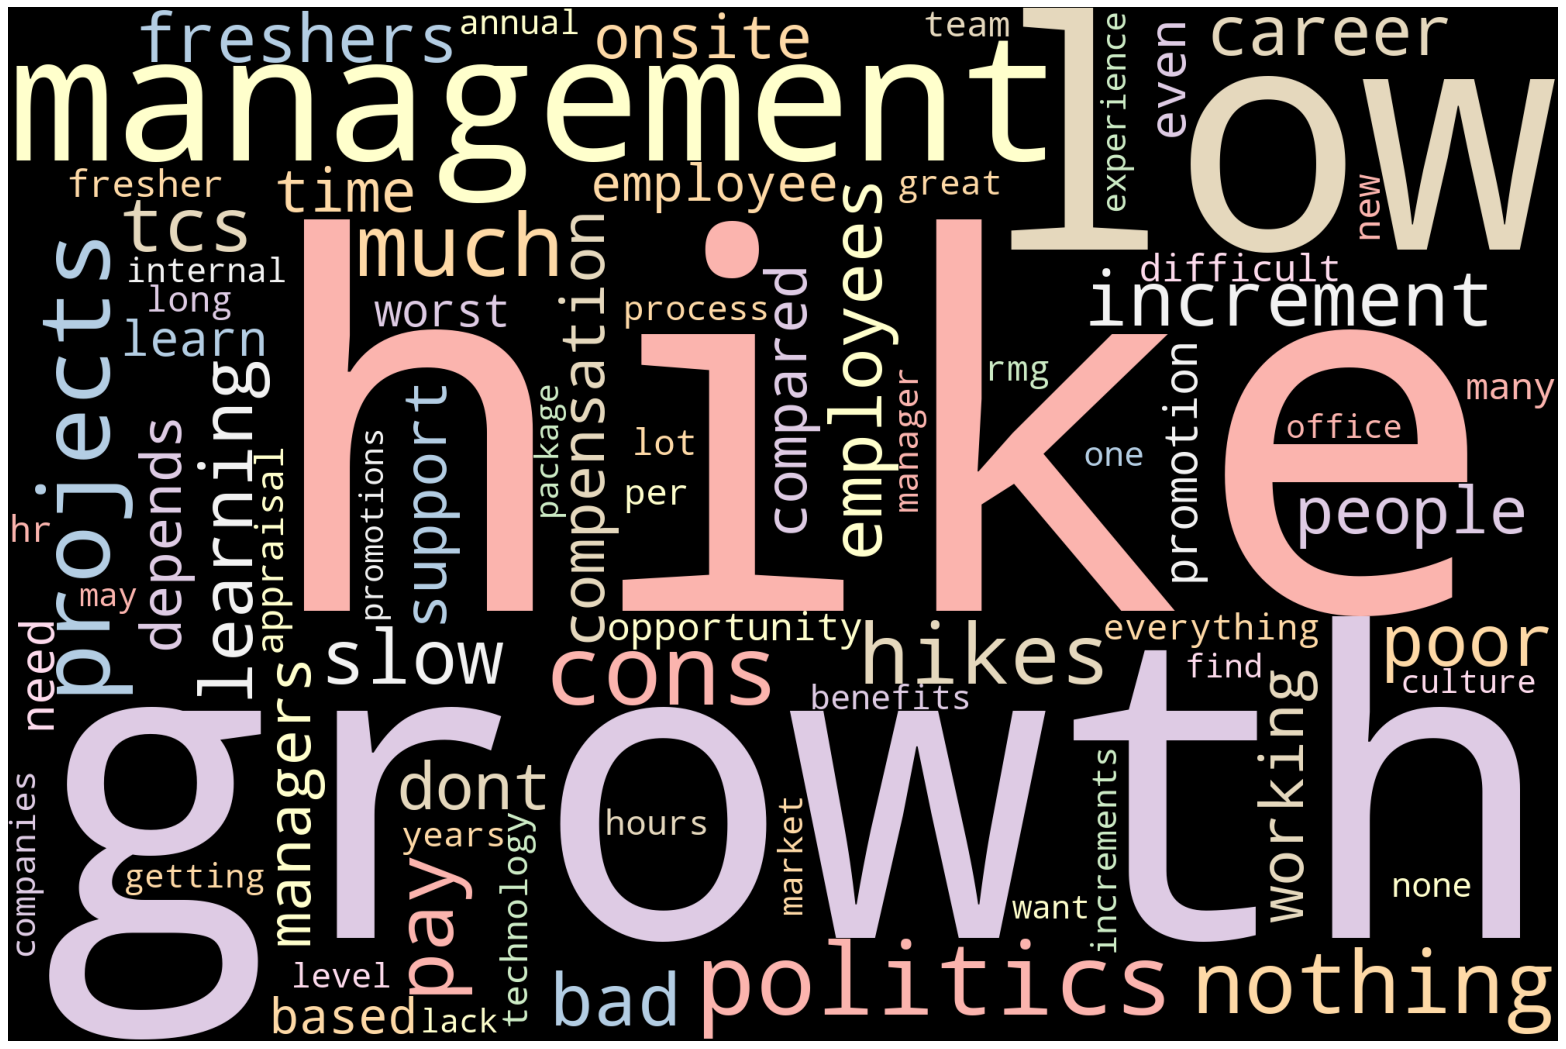

In [52]:
def plot_cloud(wordcloud1):
    fig = plt.figure(figsize=(25, 17), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud1)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close()

#Plot
plot_cloud(wordcloud1)